<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Visualização de Dados II
Caderno de **Exercícios**<br> 
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Distribuições: Histograma, KDE e Box Plot;</li>
  <li>Correlação: Gráfico de Disperção e Mapa de Calor.</li>
</ol>

---

# **Exercícios**

Nestes exercícios, você deve decidir qual é o gráfico visto em aula que melhor visualiza uma base de dados. Após decidir, você deverá criar a visualização usando o conteúdo exposto durante a aula e adicionar um pequeno parágrafo sobre um insights que pode ser extraido do gráfico.

## 1\. Preços `outliers` de diamante

In [1]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


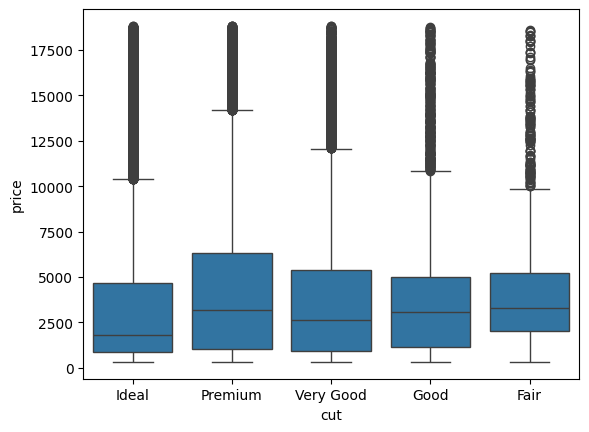

In [2]:
# gráfico do exercício 1
import matplotlib.pyplot as plt

sns.boxplot(x='cut', y='price', data=data)
plt.show()

**Insight do gráfico 1**: Aqui temos a distribuição dos preços e onde se concentram. Tambem podemos encontrar os outliers pelos pontos no grafico, que se encontram depois do fim das hastes. Com toda a certeza, temos em todos os tipos de cortes, preços que são considerados outliers entre 14900 e 18000. Abaixo dessa medida de valor, ainda podemos encontrar os outliers, mas com variação a depender do corte. 

---

## 2\. Correlação entre o do preço do diamante com seu peso (`carat`) agrupados por sua transparêcia (`clarity`)

In [5]:
import seaborn as sns

data = sns.load_dataset("diamonds")
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


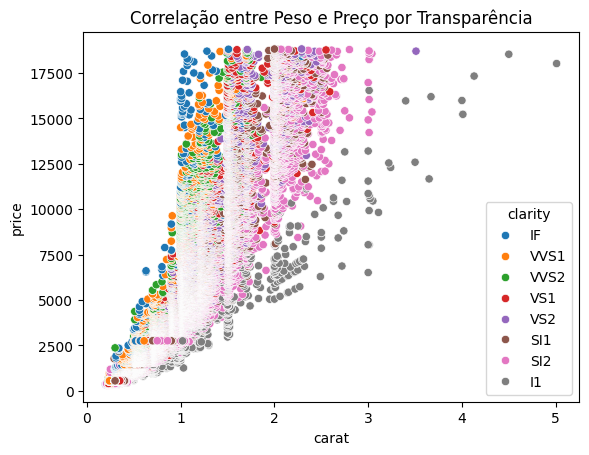

In [6]:
# gráfico do exercício 2
sns.scatterplot(x='carat', y='price', hue='clarity', data=data)
plt.title('Correlação entre Peso e Preço por Transparência')
plt.show()

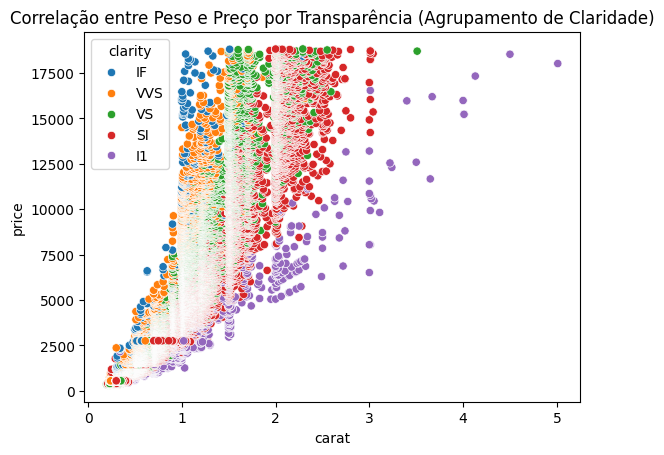

In [8]:

# Agrupe as categorias conforme sua solicitação
data['clarity'] = data['clarity'].replace({'VVS1': 'VVS', 'VVS2': 'VVS',
                                                   'VS1': 'VS', 'VS2': 'VS',
                                                   'SI1': 'SI', 'SI2': 'SI'})

# Scatter plot com cores diferenciadas por transparência
sns.scatterplot(x='carat', y='price', hue='clarity', data=data)
plt.title('Correlação entre Peso e Preço por Transparência (Agrupamento de Claridade)')
plt.show()


**Insight do gráfico 2**: Pode-ser perceber que todas as categorias que possuem transparencia entre 1 e 2 o preço já sobe ao ponto maximo, sendo que as que possuem transparencia entre 2 e 3, da claridade vs a l1, apreseram maior dispersão, sendo a maior delas para a claridade l1, que apresenta preço alto até a transparencia 3, sendo os demais pontos passiveis de serem interpretados como outliers. 

---

## 3\. Distribuição contínua aproximada do peso (`weight`) de carros

In [9]:
import seaborn as sns

data = sns.load_dataset("mpg")
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


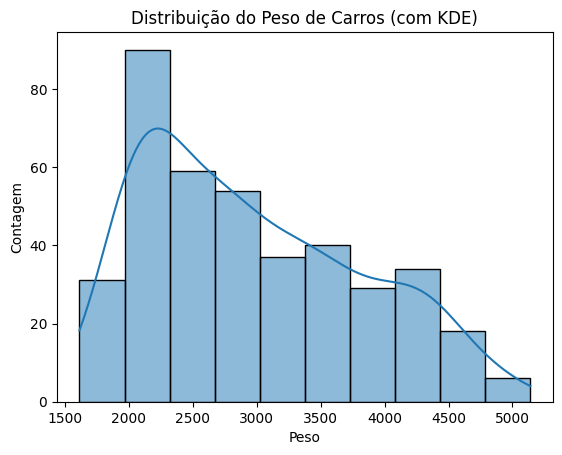

In [10]:
# gráfico do exercício 3
from seaborn import histplot

# Criando um histplot com KDE
sns.histplot(data['weight'], kde=True)
plt.title('Distribuição do Peso de Carros (com KDE)')
plt.xlabel('Peso')
plt.ylabel('Contagem')
plt.show()

**Insight do gráfico 3**: O que se repara é que conforme o peso vai aumentando, a contagem vai diminuindo, o que bate com a logica de construção de carro que nessa categoria de veiculo, existem poucos com o peso equiparado ao 5000.

---